Qiskit Grover's algo 30/24 qubits - does not work! too large of a task

In [1]:
import qiskit
import qiskit_aer
import math
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

In [2]:
def grover_30qubits_mark_all_ones(n, shots, iterations):
    qc = QuantumCircuit(n, n)

    # 1) Prepare uniform superposition |s>
    qc.h(range(n))

    def oracle_mark_all_ones(qc: QuantumCircuit):
        # Phase flip on |11...1>
        # Implement as H on last qubit, MCX with all other qubits as controls, H back.
        qc.h(n - 1)
        qc.mcx(list(range(n - 1)), n - 1)  # multi-controlled X
        qc.h(n - 1)

    def diffuser(qc: QuantumCircuit):
        # Standard diffusion: H^n X^n (phase flip on |00...0>) X^n H^n
        qc.h(range(n))
        qc.x(range(n))

        # Phase flip on |00...0>:
        # Use H on last qubit, MCX, H back, but controls need to be |1>,
        # and after X^n, |00...0> became |11...1>, so this works.
        qc.h(n - 1)
        qc.mcx(list(range(n - 1)), n - 1)
        qc.h(n - 1)

        qc.x(range(n))
        qc.h(range(n))


 # 2) Grover iterations
    for _ in range(iterations):
        oracle_mark_all_ones(qc)
        diffuser(qc)

    # 3) Measure all qubits
    qc.measure(range(n), range(n))

    backend = AerSimulator(method="matrix_product_state")

    # KEY FIX: decompose mcx into supported gates
    tqc = transpile(qc, backend=backend, optimization_level=1)

    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()
    return qc, counts



In [ ]:
# Example usage: 24 qubits, 1 Grover iteration (demo)
n = 20
qc, counts = grover_30qubits_mark_all_ones(n, shots=200, iterations=1)

#qc.draw()  # or qc.draw(output='mpl') in a notebook with matplotlibplot_histogram(counts)

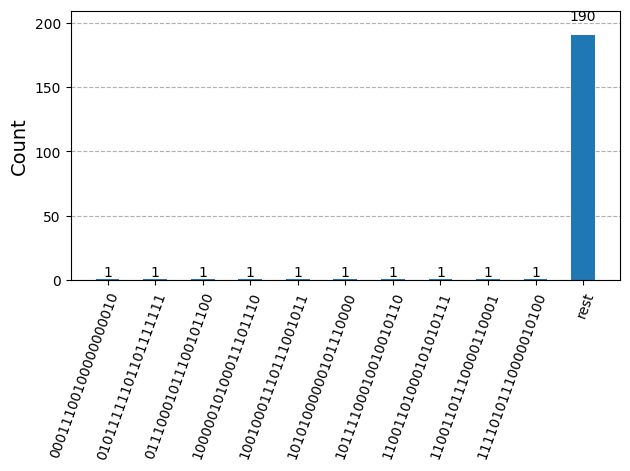

In [9]:
from qiskit.visualization import plot_histogram 
plot_histogram(counts, number_to_keep=10)